In [1]:
import compute_charge_dist as fz
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

import PeHeat_Functions as peh
import parametric_fz as fzpar
import dust_size_dist as sizedist

from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker

import pickle

import yt
from yt.units import pc, kpc, second, Kelvin, gram, erg, cm

import MCMCFit as mcmc

%matplotlib inline

Loading the library to compute the charge distribution of dust grains.


In [7]:
filename = "Percentiles_50pcent.pkl"
#data_dir = "/Users/juan/codes/run/PeHeating"
data_dit = "/home/jcibanezm/codes/run/PeHeat/ParametricHeating"
pkl_file = open("%s"%(filename), "rb")
#pkl_file = open("%s/%s"%(data_dir, filename), "rb")
percdict = pickle.load(pkl_file)
pkl_file.close

<function close>

In [9]:
# Trim the very large data.
too_high = np.where(percdict["nH"] > 1.0e6)

for key in percdict.keys():
    #arrs.append(0)
    if key!="info":
        #print(key)
        percdict[key] = np.delete(percdict[key], too_high)


/home/jcibanezm/codes/libs/miniconda3/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


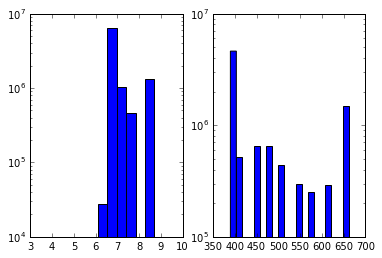

In [10]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.hist(percdict["size50"], range=[3.5,10], bins=15)
ax.set_yscale("log")
fig.show()

ax = fig.add_subplot(122)
ax.hist(percdict["size95"], bins=20)
ax.set_yscale("log")
fig.show()

In [11]:
print(len(percdict["size50"]))

9205440


In [12]:
# Separate the percentiles by phase

In [15]:
wnm = (percdict["temp"]  > 300)
cnm = ((percdict["temp"] > 30)&(percdict["temp"] < 300))
cmm = (percdict["temp"] <= 30)

wnmtrue = np.argwhere(wnm==True)[:,0]
cnmtrue = np.argwhere(cnm==True)[:,0]
cmmtrue = np.argwhere(cmm==True)[:,0]

In [16]:
#GTn = heatDict["Gtot"]*np.sqrt(heatDict["temp"])/heatDict["new_ne"]
GTn = percdict["Gtot"]*np.sqrt(percdict["temp"])/percdict["new_ne"]

In [ ]:
# Mass weighted!!!!

In [72]:
rangehere = [4.5, 9.5]
rangeplot = np.arange(np.ceil(rangehere[0]), np.ceil(rangehere[1]), 1)
hstwnm = np.histogram(percdict["size50"][wnmtrue], range=rangehere, bins=5, normed=True)
hstcnm = np.histogram(percdict["size50"][cnmtrue], range=rangehere, bins=5, normed=True)
hstcmm = np.histogram(percdict["size50"][cmmtrue], range=rangehere, bins=5, normed=True)

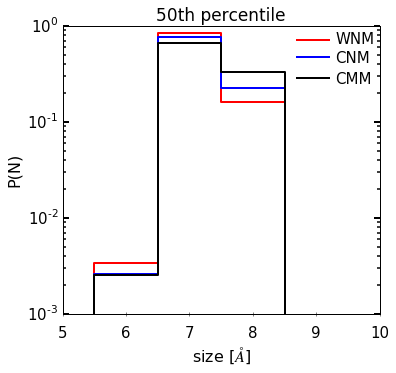

In [94]:
rangehere = [4.5, 8.5]

fig = plt.figure(figsize=(5.5,5))

ax = fig.add_axes([0.19, 0.13, 0.80, 0.80])

#ax.hist(percdict["size50"][wnmtrue], range=[4,8], bins=4, color="red", alpha=0.8, density=True, histtype='step', linewidth=2)
ax.plot(rangeplot+0.5, hstwnm[0], "-r", linestyle="steps", linewidth=2)
ax.set_yscale("log")

ax.plot(rangeplot+0.5, hstcnm[0], "-b", linestyle="steps", linewidth=2)
ax.set_yscale("log")

ax.plot(rangeplot+0.5, hstcmm[0], "-k",linestyle="steps", linewidth=2)
ax.set_yscale("log")

#ax.hist(percdict["size50"][wnmtrue], range=rangehere, bins=4, color="red", alpha=0.8, density=True, histtype='step', linewidth=2)
#ax.set_yscale("log")

#ax.hist(percdict["size50"][cnmtrue], range=rangehere, bins=4, color="blue", alpha=0.8, density=True, histtype='step', linewidth=2)
#ax.set_yscale("log")

#ax.hist(percdict["size50"][cmmtrue], range=rangehere, bins=4, color="black", alpha=0.8, density=True, histtype='step', linewidth=2)
#ax.set_yscale("log")

fig.show()

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on', labelsize=15)
ax.tick_params(axis='x', which='both', bottom='on', top='off', direction= 'inout',labelbottom='on') # labels along the bottom edge are off

ax.set_xlabel("size [$\\AA$]", fontsize=16)
ax.set_ylabel("P(N)", fontsize=16)

ax.tick_params(axis='y', left="on", which='major', length=6, width=2, labelsize=15)
ax.tick_params(axis='y', left="on", which='minor', length=3, width=1.5, labelsize=15)

ax.plot([9.2, 8.7],[0.72, 0.72], "-r", linewidth=2)
ax.text(9.3, 0.65, "WNM", fontsize=15)

ax.plot([9.2, 8.7],[0.47, 0.47], "-b", linewidth=2)
ax.text(9.3, 0.41, "CNM", fontsize=15)

ax.plot([9.2, 8.7],[0.29, 0.29], "-k", linewidth=2)
ax.text(9.3, 0.25, "CMM", fontsize=15)

ax.set_title("50th percentile", fontsize=17)

ax.set_xlim(5, 10)

fig.show()

#fig.savefig("/Users/juan/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/HeatingPercentile_50.pdf", format="pdf")

In [169]:
10**(3.1)

1258.9254117941675

In [172]:
np.log10(np.min(percdict["size95"]))

2.5907843015911354

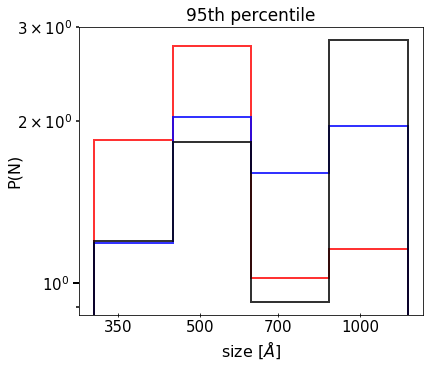

In [183]:
nbins = 4
rangehere = [2.5, 3.09]

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    # find number of multiples of pi/2
    return "%i"%10**value

fig = plt.figure(figsize=(5.5,5))

ax = fig.add_axes([0.125, 0.13, 0.87, 0.80])

ax.hist(np.log10(percdict["size95"][wnmtrue]), range=rangehere, bins=nbins, color="red", alpha=0.8, density=True, histtype='step', linewidth=2)
ax.set_yscale("log")
fig.show()

ax.hist(np.log10(percdict["size95"][cnmtrue]), range=rangehere, bins=nbins, color="blue", alpha=0.8, density=True, histtype='step', linewidth=2)
ax.set_yscale("log")
fig.show()

ax.hist(np.log10(percdict["size95"][cmmtrue]), range=rangehere, bins=nbins, color="black", alpha=0.8, density=True, histtype='step', linewidth=2)
ax.set_yscale("log")
fig.show()

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on', labelsize=15)
ax.tick_params(axis='x', which='both', bottom='on', top='off', direction= 'inout',labelbottom='on') # labels along the bottom edge are off

ax.set_xlabel("size [$\\AA$]", fontsize=16)
ax.set_ylabel("P(N)", fontsize=16, labelpad=-5)


ax.tick_params(axis='y', left="on", which='major', length=6, width=2, labelsize=15)
ax.tick_params(axis='y', left="on", which='minor', length=3, width=1.5, labelsize=15)


majors = np.log10([350.1, 500.1, 700.1, 1000.1])
#majors = np.log10([400.1, 600.1, 770.1, 1000, 1500])
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.set_title("95th percentile", fontsize=17)

fig.show()

fig.savefig("/Users/juan/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/HeatingPercentile_95.pdf", format="pdf")

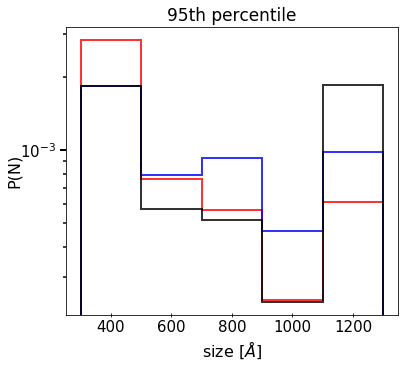

In [197]:
nbins = 5
rangehere = [300, 1300]

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    # find number of multiples of pi/2
    return "%i"%10**value

fig = plt.figure(figsize=(5.5,5))

ax = fig.add_axes([0.155, 0.13, 0.84, 0.80])

ax.hist((percdict["size95"][wnmtrue]), range=rangehere, bins=nbins, color="red", alpha=0.8, density=True, histtype='step', linewidth=2)
ax.set_yscale("log")
fig.show()

ax.hist((percdict["size95"][cnmtrue]), range=rangehere, bins=nbins, color="blue", alpha=0.8, density=True, histtype='step', linewidth=2)
ax.set_yscale("log")
fig.show()

ax.hist((percdict["size95"][cmmtrue]), range=rangehere, bins=nbins, color="black", alpha=0.8, density=True, histtype='step', linewidth=2)
ax.set_yscale("log")
fig.show()

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on', labelsize=15)
ax.tick_params(axis='x', which='both', bottom='on', top='off', direction= 'inout',labelbottom='on') # labels along the bottom edge are off

ax.set_xlabel("size [$\\AA$]", fontsize=16)
ax.set_ylabel("P(N)", fontsize=16, labelpad=-2)


ax.tick_params(axis='y', left="on", which='major', length=6, width=2, labelsize=15)
ax.tick_params(axis='y', left="on", which='minor', length=3, width=1.5, labelsize=15)


#majors = np.log10([350.1, 500.1, 700.1, 1000.1])
#majors = np.log10([400.1, 600.1, 770.1, 1000, 1500])
#ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
#ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

ax.set_title("95th percentile", fontsize=17)

fig.show()

fig.savefig("/Users/juan/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/HeatingPercentile_95.pdf", format="pdf")